# 지도학습

# 규제 선형 모델(Ridge_Lasso_Regression)

### Linear Regression 문제

- 단순 선형회귀: 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한 회귀 모델을 찾는 것

- 다중 선형회귀: 여러개의 특성을 활용해서 회귀모델을 찾는 것

다중 선형 회귀 모들은 **과대적합(overfitting)** 될 때가 종종 발생한다.

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것

- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움(일반화 능력이 떨어짐)

- Ridge / Lasso / Elastic Regression 등장

### Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가, Bias는 감소 -> Overfitting 발생

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함

- Overfitting 문제 해결: 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소

학습을 시킬수록 (=모델 복잡도가 올라갈 수록) Bias(편향)은 줄어드나 variance(분산)는 올라간다.

학습이 덜 될수록 (=모델 복잡도가 낮을 수록) Bias(편향)은 올라가나 variance(분산)는 내려간다.

|구분| 모델 복잡도| 적합성|
|---|---|---|
|Bias 오차가 낮은 & Variance 오차가 높은|복잡| 과대적합(over fitting)|
 |Bias 오차가 높은 Variance 오차가 낮은| 단순| 과소적합(under fitting)|

 

- Bias 에러가 높아지는 것은 많은 데이터를 고려하지 않아 (=모델이 너무 단순) 정확한 예측을 하지 못하는 경우

- Variance 에러는 노이즈까지 전부 학습하여 (=모델이 너무 복잡) 약간의 input에도 예측 Y 값이 크게 흔들리는 것

이 두가지 에러가 상호 Trade-off 관계에 있어서 이 둘을 모두 잡는 것은 불가능한 딜레마가 발생

### 정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미

- 가중치(w)의 값을 조정하여 제약을 주는 것

- L1 규제: Lasso

    - w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법

    - 특정 계수들은 0이 됨

    - 특성선택(Feature Selection)이 자동으로 이루어진다.

- L2 규제: Ridge

    - w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.

# Ridge

### 평균제곱오차식에 alpha 항이 추가

- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소)

- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 -> 가중치에 대한 제곱의 합을 사용
- <font  color=blue>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=red> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=blue>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

$$
 cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) 
 $$

- MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 Bias(편향)는 증가하고 Variance(분산)는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=blue>bias을 약간 손해보면서 Variance를 크게 줄여</font> 성능의 향상

- 단점 : <font  color=blue>몇몇 변수가 중요하더라도 모든 변수에 대해 적합 해야 하고 완벽한 0은 나오지 않음</font> -> 예측의 문제가 아니라 해석의 문제

### Ridge()

```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정

# Ridge Lasso Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 확장 보스턴 집값
X, y = mglearn.datasets.load_extended_boston()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 104), (127, 104), (379,), (127,))

In [5]:
model_lr = LinearRegression().fit(X_train, y_train)

In [6]:
# 훈련 세트 점수
model_lr.score(X_train, y_train)

0.9520519609032732

In [7]:
# 테스트 세트 점수
model_lr.score(X_test, y_test)

0.607472195966588

- 위 두값에 차이가 크다

- 과대적합 상태

- 훈련 셋에 비해 테스트 셋의 경우 정확도가 많이 떨어짐 -> 과대적합

### Ridge 적용하기

In [8]:
# model ridge
model_ridge = Ridge().fit(X_train, y_train)

In [9]:
print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 과대적합이 조금 해결됬다.

- default로 alpha값은 1이다.

### alpha 값 조정

In [10]:
alpha = 10

model_ridge_10 = Ridge(alpha=alpha).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_10.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_ridge_10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [11]:
alpha = 0.1

model_ridge_01 = Ridge(alpha=alpha).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_01.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_ridge_01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


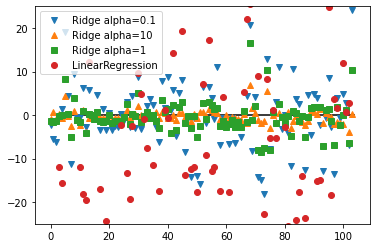

In [12]:
# alpha 값의 변화에 따른 가중치(coef_)의 변화
plt.plot(model_ridge_01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(model_ridge_10.coef_, '^', label='Ridge alpha=10')
plt.plot(model_ridge.coef_, 's', label='Ridge alpha=1')

plt.plot(model_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(model_lr.coef_))

plt.ylim(-25, 25)
plt.legend()
plt.show()

- x 축은 coef_의 원소를 위치대로 나열한 것 (x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수로 x=100까지 계속)

- y 축은 각 계수의 수치

- alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치

- alpha=1일 때 Ridge 모델의 계수는 좀 더 증가

- alpha=0.1일 때 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감.

# Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법

- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 

-  가중치의 절대값의 합을 사용

- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 

-  가중치의 절대값의 합을 사용

> \\(  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} \\)


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함

- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표

- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)

- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.


Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [17]:
from sklearn.linear_model import Lasso
import numpy as np

# Lasso
model_lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_lasso.score(X_test, y_test)))

print("사용한 특성의 수: {}".format(np.sum(model_lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [22]:
model_lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso001.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_lasso001.score(X_test, y_test)))

print("사용한 특성의 수: {}".format(np.sum(model_lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [23]:
model_lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso00001.score(X_train, y_train)))

print("테스트 세트 점수: {:.2f}".format(model_lasso00001.score(X_test, y_test)))

print("사용한 특성의 수: {}".format(np.sum(model_lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


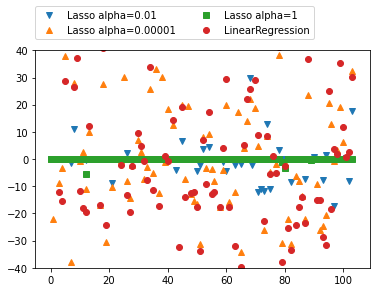

In [26]:
plt.plot(model_lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(model_lasso00001.coef_, '^', label='Lasso alpha=0.00001')
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')

plt.plot(model_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(model_lr.coef_))

plt.ylim(-40, 40)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()